**Import needed libraries**

In [761]:
import pandas as pd
import seaborn as sns
import plotly_express as px
from datetime import datetime
import calendar 

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

## 1 - Warming up

This project will be centered around the Chicago Crime & selected Census data. Start of by downloading both datasets.

**1.1** Read through the documentation for both datasets. Do this *thoroughly*!

Chicago crime data : https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2

Chicago census data : https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2



**1.2** Now download both datasets as .csv files. You get the option to download by frist clicking on the 'Export' tab. Be mindful that the crime dataset is over 2GB in size, so it might take awhile to download.

Once downloaded, rename the files chicago_crime.csv & chicago_census.csv, respectively, and put them in the same folder as this notebook.

**1.3** Load data. The following reads should now work.

In [198]:
chicago_crime_2001_to_2023_df = pd.read_csv('chicago_crime.csv')
chicago_census_2008_to_2012_df = pd.read_csv('chicago_census.csv')

**1.4** The census data already contains records that apply for the period 2008-2012. Now filter the crime data so that it also contains records only for the years in that period. 

Hint: You probably need to work with the existing Date column. Transform the values from strings to datetime-objects. This operation shouldn't take more than a minute or so using .apply()

**Important:** For the rest of this project, we will only work with data for the year 2008-2012.

In [1400]:
def formatDate(day):
    input_us_time = "%m/%d/%Y %I:%M:%S %p"
    output = datetime.strptime(day,input_us_time)
    return output
def convert_month(month):
    month = calendar.month_name[month]
    return month
def format_day(day):
    weekDaysMapping = ("Monday", "Tuesday", 
                   "Wednesday", "Thursday",
                   "Friday", "Saturday",
                   "Sunday")
    return weekDaysMapping[day]
def analyze_locations(df, year, crime_type, arrest_status):
    filtered_df = df[(df['Primary Type'] == crime_type) & (df['Year'] == year) & (df['Arrest'] == arrest_status)]
    return filtered_df['Location'].value_counts().head()

In [200]:
chicago_crime_2001_to_2023_df["Date"] = chicago_crime_2001_to_2023_df["Date"].apply(formatDate) 

In [201]:
chicago_crime_2008_to_2012_df = chicago_crime_2001_to_2023_df[(pd.DatetimeIndex(chicago_crime_2001_to_2023_df["Date"]).year >= 2008) & (pd.DatetimeIndex(chicago_crime_2001_to_2023_df["Date"]).year <= 2012) ].reset_index(drop=True)

In [202]:
chicago_crime_2008_to_2012_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11645833,JC213044,2012-05-05 12:25:00,057XX W OHIO ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,29.0,25.0,11,NaN,NaN,2012,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11646447,JC213946,2008-10-24 14:30:00,036XX N NARRAGANSETT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,36.0,17.0,11,NaN,NaN,2008,04/07/2019 04:05:59 PM,NaN,NaN,NaN
2,11031104,JA362043,2008-07-24 00:01:00,031XX W FILLMORE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,True,...,24.0,29.0,17,NaN,NaN,2008,07/26/2017 03:56:50 PM,NaN,NaN,NaN
3,11648237,JC216157,2012-01-01 12:00:00,115XX S CAMPBELL AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,19.0,75.0,11,NaN,NaN,2012,04/09/2019 04:24:58 PM,NaN,NaN,NaN
4,11648822,JC216887,2011-12-13 00:00:00,115XX S MARSHFIELD AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,ATHLETIC CLUB,False,False,...,34.0,75.0,11,NaN,NaN,2011,04/09/2019 04:24:58 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878850,12012717,JD189149,2008-02-01 17:55:00,085XX S KOLMAR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,18.0,70.0,11,NaN,NaN,2008,03/19/2020 03:45:37 PM,NaN,NaN,NaN
1878851,12082285,JD269088,2012-06-18 09:00:00,016XX W FARWELL AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,49.0,1.0,11,NaN,NaN,2012,06/20/2020 03:43:39 PM,NaN,NaN,NaN
1878852,12010199,JD187029,2011-06-01 13:00:00,030XX N ELBRIDGE AVE,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,APARTMENT,False,True,...,35.0,21.0,02,NaN,NaN,2011,09/07/2021 03:41:02 PM,NaN,NaN,NaN
1878853,12206132,JD414165,2010-11-01 12:00:00,116XX S STATE ST,0265,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,RESIDENCE,False,False,...,34.0,53.0,02,NaN,NaN,2010,10/29/2020 03:45:00 PM,NaN,NaN,NaN


# 2 - Cleaning up the mess

**Note:** The rest of the problems don't really require you to finish this section - you could revisit these questions at a later time. 

Bear in mind though that the numbers you aquire in the problems ahead may or may not change a bit, depending on how you choose to treat the duplicates and missing values here.  

In [203]:
def barplot_by_dt(data_frame):
    
    df_null_counts = data_frame.isnull().sum()
    df_null_counts = df_null_counts[df_null_counts > 0 ]  
    
    plt.figure(figsize=(12,6))
    sns.barplot(x= df_null_counts.index, y=df_null_counts.values, )

    plt.title("Plotting missing value of columns")
    plt.show()

**2.1** How many duplicated rows are there in crime data set? If there are any, remove them.

In [204]:
duplicates =chicago_crime_2008_to_2012_df.duplicated().sum()
print(f"There are {duplicates} duplicates in the chicage crime")

There are 0 duplicates in the chicage crime


**2.2** What columns in the crime dataset has missing values, and how many are they?

In [206]:
non_values =  chicago_crime_2008_to_2012_df.isnull().sum()

Location Description     1043
District                   40
Ward                       46
Community Area            854
X Coordinate            16232
Y Coordinate            16232
Latitude                16232
Longitude               16232
Location                16232
dtype: int64


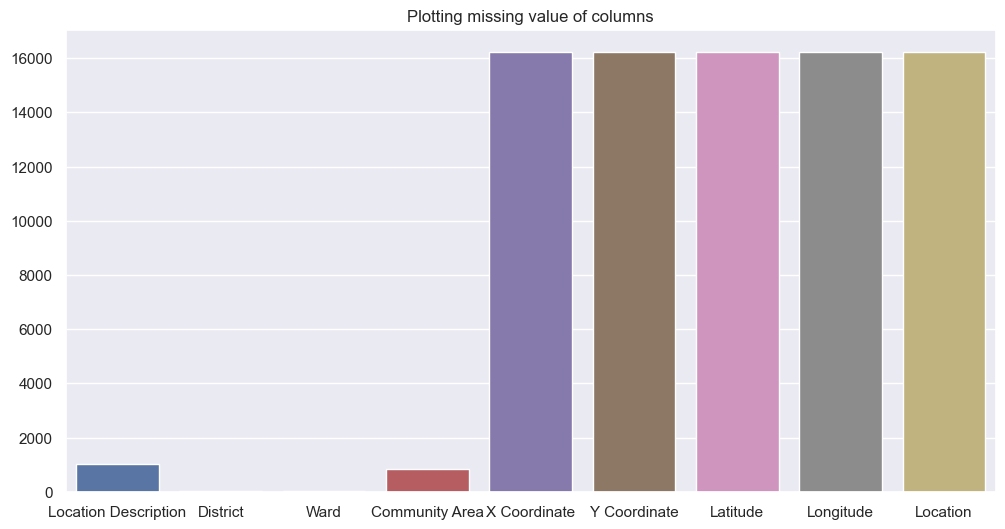

In [207]:
tnon_values = non_values[non_values > 0]
print(tnon_values)
barplot_by_dt(chicago_crime_2008_to_2012_df)

**2.3*** Now, for all the columns with missing values you've identified, chose on of the following:

        a) remove the entire row with the missing value
        b) replace the missing values with another suitable value
        c) don't do anything, leave the missing values as is

All options above are completely valid! However, I want you to, for all columns with missing values, **clearly** argue for why you chose to do what you do.

In [208]:
chicago_crime_2008_to_2012_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11645833,JC213044,2012-05-05 12:25:00,057XX W OHIO ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,29.0,25.0,11,NaN,NaN,2012,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11646447,JC213946,2008-10-24 14:30:00,036XX N NARRAGANSETT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,36.0,17.0,11,NaN,NaN,2008,04/07/2019 04:05:59 PM,NaN,NaN,NaN
2,11031104,JA362043,2008-07-24 00:01:00,031XX W FILLMORE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,True,...,24.0,29.0,17,NaN,NaN,2008,07/26/2017 03:56:50 PM,NaN,NaN,NaN
3,11648237,JC216157,2012-01-01 12:00:00,115XX S CAMPBELL AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,19.0,75.0,11,NaN,NaN,2012,04/09/2019 04:24:58 PM,NaN,NaN,NaN
4,11648822,JC216887,2011-12-13 00:00:00,115XX S MARSHFIELD AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,ATHLETIC CLUB,False,False,...,34.0,75.0,11,NaN,NaN,2011,04/09/2019 04:24:58 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878850,12012717,JD189149,2008-02-01 17:55:00,085XX S KOLMAR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,18.0,70.0,11,NaN,NaN,2008,03/19/2020 03:45:37 PM,NaN,NaN,NaN
1878851,12082285,JD269088,2012-06-18 09:00:00,016XX W FARWELL AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,49.0,1.0,11,NaN,NaN,2012,06/20/2020 03:43:39 PM,NaN,NaN,NaN
1878852,12010199,JD187029,2011-06-01 13:00:00,030XX N ELBRIDGE AVE,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,APARTMENT,False,True,...,35.0,21.0,02,NaN,NaN,2011,09/07/2021 03:41:02 PM,NaN,NaN,NaN
1878853,12206132,JD414165,2010-11-01 12:00:00,116XX S STATE ST,0265,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,RESIDENCE,False,False,...,34.0,53.0,02,NaN,NaN,2010,10/29/2020 03:45:00 PM,NaN,NaN,NaN


## 3 - The Birds Eye

**3.1** Do some exploratory analysis on the dataset and try to get a sense of the data you're working with.

In [ ]:
# no need to provide an answer to this questions in the notebook you send in


**3.2** How many crimes records exists for the period 2008-2012, in total?

In [209]:
print(f"There are {len(chicago_crime_2008_to_2012_df):,.0f} crime record in Chicago beetween 2008 -2019")

There are 1,878,855 crime record in Chicago beetween 2008 -2019


**3.3** What's the number of recorded crimes for each of the years, individually? 

In [210]:
chicago_crime_recorded_2008_to_2012_serie = chicago_crime_2008_to_2012_df['Year'].value_counts()

In [884]:
print(f"recorded crimes: \n{chicago_crime_recorded_2008_to_2012_serie}")

recorded crimes: 
Year
2008    427185
2009    392828
2010    370518
2011    351997
2012    336327
Name: count, dtype: int64


**3.4** Has the number of recorded crimes increased, decreased or remained stable throughout the years?

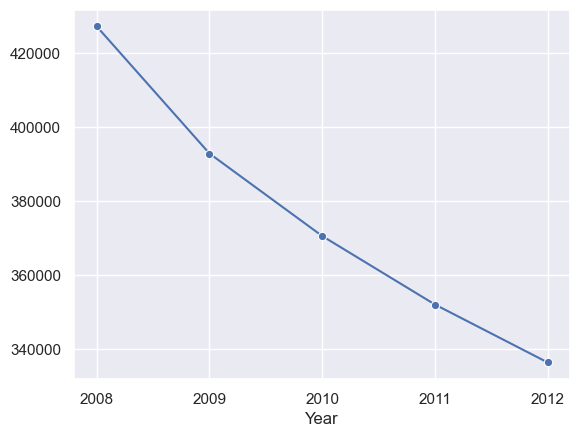

In [212]:
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=chicago_crime_recorded_2008_to_2012_serie, x=chicago_crime_recorded_2008_to_2012_serie.index, y=chicago_crime_recorded_2008_to_2012_serie.values, marker="o")
ax.set_xticks(chicago_crime_recorded_2008_to_2012_df['Year'])
# ax.set_xticklabels(chicago_crime_recorded_2008_to_2012_df['Year'].astype(int))
# ax.set_ylim(bottom=chicago_crime_recorded_2008_to_2012_df['Year'].min(), top=chicago_crime_recorded_2008_to_2012_df['Year'].max())

plt.show()


**3.5** By how many percentage points has the crime rate increased/decreased during the period? 

Hint: You only need to compare the number of crime records from 2008 with the number of crime records from 2012.

In [213]:
procentage_decreased = round((chicago_crime_recorded_2008_to_2012_serie.values[0] - chicago_crime_recorded_2008_to_2012_serie.values[-1] )/ chicago_crime_recorded_2008_to_2012_serie.values[0] * 100
,1)
print(f"The crime rate has deacreased with {procentage_decreased}% from 2008 to 2012")

The crime rate has deacreased with 21.3% from 2008 to 2012


**3.6** Which primary crime types have increasing crime record numbers, and which ones have decreasing, when comparing 2008 to 2012?

In [339]:
chicago_crime_2008_df= chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Year"] == 2008]
chicago_crime_2012_df= chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Year"] == 2012]


In [340]:
chicago_crime_2008_serie_primary_type = chicago_crime_2008_df["Primary Type"].value_counts()
chicago_crime_2008_per_type_df = pd.DataFrame(chicago_crime_2008_serie_primary_type).reset_index()


In [1228]:
chicago_crime_2012_serie_primary_type = chicago_crime_2012_df["Primary Type"].value_counts()
chicago_crime_2012_per_type_df = pd.DataFrame(chicago_crime_2012_serie_primary_type).reset_index()


In [350]:
chicago_crime_2012_per_type_df.rename(columns={"count": "Count 2012"}, inplace=True)
chicago_crime_2008_per_type_df.rename(columns={"count": "Count 2008"}, inplace=True)


In [361]:
merged_08_and_12 = pd.merge(chicago_crime_2008_per_type_df,chicago_crime_2012_per_type_df, on="Primary Type")
merged_08_and_12

,Primary Type,Count 2008,Count 2012
0,THEFT,88437,75465
1,BATTERY,75930,59134
2,CRIMINAL DAMAGE,52843,35855
3,NARCOTICS,46506,35489
4,OTHER OFFENSE,26532,17524
5,BURGLARY,26218,22845
6,ASSAULT,25448,19900
7,MOTOR VEHICLE THEFT,18881,16492
8,ROBBERY,16703,13485
9,DECEPTIVE PRACTICE,14933,13766


In [362]:
difference_08_and_12 = merged_08_and_12["Count 2012"] - merged_08_and_12["Count 2008"] 
# difference_08_and_12

In [363]:
merged_08_and_12["Difference 2008 - 2012"] = difference_08_and_12

In [1116]:
merged_08_and_12
# * plot kolla

,Primary Type,Count 2008,Count 2012,Difference 2008 - 2012
0,THEFT,88437,75465,-12972
1,BATTERY,75930,59134,-16796
2,CRIMINAL DAMAGE,52843,35855,-16988
3,NARCOTICS,46506,35489,-11017
4,OTHER OFFENSE,26532,17524,-9008
5,BURGLARY,26218,22845,-3373
6,ASSAULT,25448,19900,-5548
7,MOTOR VEHICLE THEFT,18881,16492,-2389
8,ROBBERY,16703,13485,-3218
9,DECEPTIVE PRACTICE,14933,13766,-1167


**3.7*** Which are the top 5 primary crime types in terms of increasing crime records between 2008 and 2012? Which are the top 5 primary crime types in terms of *percentual* increase? 

Are the top 5 lists you just produced different? If so, why?   

In [1205]:
sorted_by_increase_merged_08_and_12 = merged_08_and_12.sort_values(by="Difference 2008 - 2012",ascending=False)

In [1206]:
filter_merged_08_and_12_positive=sorted_by_increase_merged_08_and_12["Difference 2008 - 2012"] > 0
sorted_by_increase_merged_08_and_12= sorted_by_increase_merged_08_and_12[filter_merged_08_and_12_positive]
sorted_by_increase_merged_08_and_12

,Primary Type,Count 2008,Count 2012,Difference 2008 - 2012
20,INTERFERENCE WITH PUBLIC OFFICER,580,1228,648
12,WEAPONS VIOLATION,3877,3907,30
25,CRIMINAL SEXUAL ASSAULT,48,67,19
24,STALKING,190,207,17
28,PUBLIC INDECENCY,4,17,13
26,OBSCENITY,13,26,13
21,HOMICIDE,513,515,2


In [1207]:
sorted_by_increase_merged_08_and_12["increase %"] = round((sorted_by_increase_merged_08_and_12["Difference 2008 - 2012"]/sorted_by_increase_merged_08_and_12["Count 2008"]) * 1000)

In [1216]:
top_5_highest_merged_08_and_12 = sorted_by_increase_merged_08_and_12.head(5)
top_5_highest_percent_merged_08_and_12 = sorted_by_increase_merged_08_and_12.sort_values(by="increase %",ascending=False).head(5)


In [1220]:
print(f"They shows different becassue some crimes has small values in 2008 then in 2012 they did 2x-3x")
# * Plot histogram 

They shows different becassue some crimes has small values in 2008 then in 2012 they did 2x-3x


# 4 - Chicago Police Departement performance assessment

**4.1** How many recorded crimes have in total led to an arrest? What's the corresponding arrest percentage?

In [467]:
chicago_crime_2008_to_2012_arrests_df= chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Arrest"] == True]
# chicago_crime_2008_to_2012_arrests_false_df= chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Arrest"] == False]


In [479]:
arrest_percentage= round((len(chicago_crime_2008_to_2012_arrests_df) /len(chicago_crime_2008_to_2012_df) ) * 100)

In [480]:
print(f"The corresponding arrest {arrest_percentage}%")




The corresponding arrest 27%


**4.2** Has the arrest rate percentage been increasing, decreasing or remained stable over these years?

In [574]:
merged_years_dt= pd.merge(chicago_crime_2008_to_2012_df["Year"].value_counts(),
chicago_crime_2008_to_2012_arrests_df["Year"].value_counts(), on="Year")


In [577]:
merged_years_dt = merged_years_dt.reset_index().rename(columns={"count_x": "Total_crime", "count_y":"True_arrest"})

In [601]:
percentage_per_year = (merged_years_dt["True_arrest"] / merged_years_dt["Total_crime"]) * 100 
percentage_per_year = pd.DataFrame(percentage_per_year).rename(columns={0: "%"})
percentage_per_year

,%
0,25.754884
1,28.213111
2,27.137413
3,27.356199
4,26.960369


In [1222]:
print("As you can se it has gone up and down over years")
pd.concat([merged_years_dt,percentage_per_year],axis=1)
# * plot line graph

As you can se it has gone up and down over years


,Year,Total_crime,True_arrest,%
0,2008,427185,110021,25.754884
1,2009,392828,110829,28.213111
2,2010,370518,100549,27.137413
3,2011,351997,96293,27.356199
4,2012,336327,90675,26.960369


**4.3** For the Year 2011, which month has the highest arrest percentage?

In [785]:
chicago_crime_2011_df = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Year"] == 2011].reset_index()
chicago_crime_2011_arrests_df = chicago_crime_2011_df[chicago_crime_2011_df["Arrest"] == True]


In [783]:
chicago_crime_2011_month_df=pd.DataFrame(pd.DatetimeIndex(chicago_crime_2011_df["Date"]).month.value_counts()).reset_index()
chicago_crime_2011_month_arrest_df= pd.DataFrame(pd.DatetimeIndex(chicago_crime_2011_arrests_df["Date"]).month.value_counts()).reset_index()


,Date,count
0,8,9042
1,7,8861
2,6,8565
3,3,8411
4,9,8287
5,5,8154
6,10,7970
7,4,7910
8,1,7861
9,11,7448


In [756]:
chicago_total_crime_2011=pd.merge(chicago_crime_2011_month_df,chicago_crime_2011_month_arrest_df, on="Date").rename(columns={"Date":"month","count_x": "crimes","count_y":"arrests"})

In [757]:
chicago_total_crime_2011["%"] = (chicago_total_crime_2011["arrests"] / chicago_total_crime_2011["crimes"]) * 100   

In [763]:
chicago_total_crime_2011 = chicago_total_crime_2011.sort_values(by="%",ascending=False).reset_index(drop=True)
# chicago_total_crime_2011["month"].head(1)
chicago_total_crime_2011["month"] = chicago_total_crime_2011["month"].apply(convert_month) 

In [842]:
print(f"The month is: {chicago_total_crime_2011.month.head(1).sum()}")
chicago_total_crime_2011

The month is: March


,month,crimes,arrests,%
0,March,28702,8411,29.304578
1,February,22239,6496,29.209946
2,January,27228,7861,28.871015
3,August,32602,9042,27.734495
4,September,29946,8287,27.673145
5,April,29116,7910,27.167193
6,December,27031,7288,26.961637
7,November,27661,7448,26.925997
8,July,33264,8861,26.638408
9,June,32322,8565,26.498979


**4.4** For the same year, and the particular month of you've identified in question 2.3, which primary crime type has the highest number of arrests?

In [788]:
chicago_crime_2011_arrests_march_df= chicago_crime_2011_arrests_df[pd.DatetimeIndex(chicago_crime_2011_arrests_df["Date"]).month == 3]

In [1311]:
primary_type_highest_arrests= chicago_crime_2011_arrests_march_df["Primary Type"].value_counts().head(1)


In [864]:
print(f"Primary crime type is {primary_type_highest_arrests.index[0]} with count {primary_type_highest_arrests.sum()} case numbers")

Primary crime type is NARCOTICS with count 3747 case numbers


**4.5*** Which primary crime categories enjoy the highest percentual increase in number of arrests, while comparing 2008 and 2012? At what location do these arrest most often occur? Also answer, for the same prime categories, at what location the crimes that dont lead to an arrest most often occur. Can you find some interesting relations?

In [1680]:
chicago_crime_2012_arrests_true_df=chicago_crime_2012_df[chicago_crime_2012_df["Arrest"] == True]
chicago_crime_2012_arrests_false_df= chicago_crime_2012_df[chicago_crime_2012_df["Arrest"] == False]

chicago_crime_2008_arrests_true_df= chicago_crime_2008_df[chicago_crime_2008_df["Arrest"] == True]
chicago_crime_2008_arrests_false_df= chicago_crime_2008_df[chicago_crime_2008_df["Arrest"] == False]




In [1681]:
chicago_crime_2012_arrests_true_type_df=chicago_crime_2012_arrests_true_df["Primary Type"].value_counts()
chicago_crime_2008_arrests_true_type_df=chicago_crime_2008_arrests_true_df["Primary Type"].value_counts()

merged_08_12_true_arrests_df = pd.merge(chicago_crime_2008_arrests_true_type_df,chicago_crime_2012_arrests_true_type_df, left_index=True, right_index=True,suffixes=['_2008', '_2012']).reset_index()

In [1682]:
merged_08_12_true_arrests_df =merged_08_12_true_arrests_df.rename(columns={"count_2008": "arrests_2008","count_2012": "arrests_2012"})
merged_08_12_true_arrests_df["increase%"] = round(((merged_08_12_true_arrests_df["arrests_2012"] - merged_08_12_true_arrests_df["arrests_2008"])/merged_08_12_true_arrests_df["arrests_2008"]) *100,1)


In [1683]:
filter_postive = merged_08_12_true_arrests_df["increase%"] > 0

merged_08_12_true_arrests_sorted_postive_df = merged_08_12_true_arrests_df[filter_postive].sort_values(by="increase%", ascending=False)
merged_08_12_true_arrests_sorted_postive_df

,Primary Type,arrests_2008,arrests_2012,increase%
28,PUBLIC INDECENCY,3,17,466.7
17,INTERFERENCE WITH PUBLIC OFFICER,460,1162,152.6
26,OBSCENITY,13,23,76.9
24,STALKING,24,38,58.3
9,DECEPTIVE PRACTICE,2173,2976,37.0
10,PUBLIC PEACE VIOLATION,1776,2251,26.7
8,WEAPONS VIOLATION,2923,3264,11.7
25,CRIMINAL SEXUAL ASSAULT,14,15,7.1


highest primary percent crime


In [1697]:
highest_percent_primary_crime = merged_08_12_true_arrests_sorted_postive_df.head(5).value_counts()
highest_percent_primary_crime_list = highest_percent_primary_crime.index.get_level_values(0).to_list()

getting most arrested place choose location descripiton  becasue location has a lot of missing data

In [1699]:
true_arrest_12_df = chicago_crime_2012_arrests_true_df[chicago_crime_2012_arrests_true_df["Primary Type"].isin(highest_percent_primary_crime_list)]
false_arrest_12_df = chicago_crime_2012_arrests_false_df[chicago_crime_2012_arrests_false_df["Primary Type"].isin(highest_percent_primary_crime_list)]
concated_12_arrests_all = pd.concat([true_arrest_12_df,false_arrest_12_df])

# true_arrest_12_df


In [1713]:
pivot_table = pd.pivot_table(true_arrest_12_df, 
                             values='ID', # Or any other column that you want to count
                             index=['Primary Type', 'Arrest'], 
                             columns='Location Description', 
                             aggfunc='count')
pivot_table_filled = pivot_table.fillna(0)

pivot_table_filled.head()

,Location Description,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),...,"SCHOOL, PUBLIC, GROUNDS",SIDEWALK,SMALL RETAIL STORE,STREET,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT/LAND,VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,WAREHOUSE
Primary Type,Arrest,,,,,,,,,,,,,,,,,,,,,
DECEPTIVE PRACTICE,True,10.0,2.0,2.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,...,2.0,169.0,23.0,249.0,6.0,39.0,5.0,13.0,3.0,2.0
INTERFERENCE WITH PUBLIC OFFICER,True,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2.0,308.0,6.0,508.0,0.0,0.0,7.0,26.0,1.0,0.0
OBSCENITY,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PUBLIC INDECENCY,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
STALKING,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0


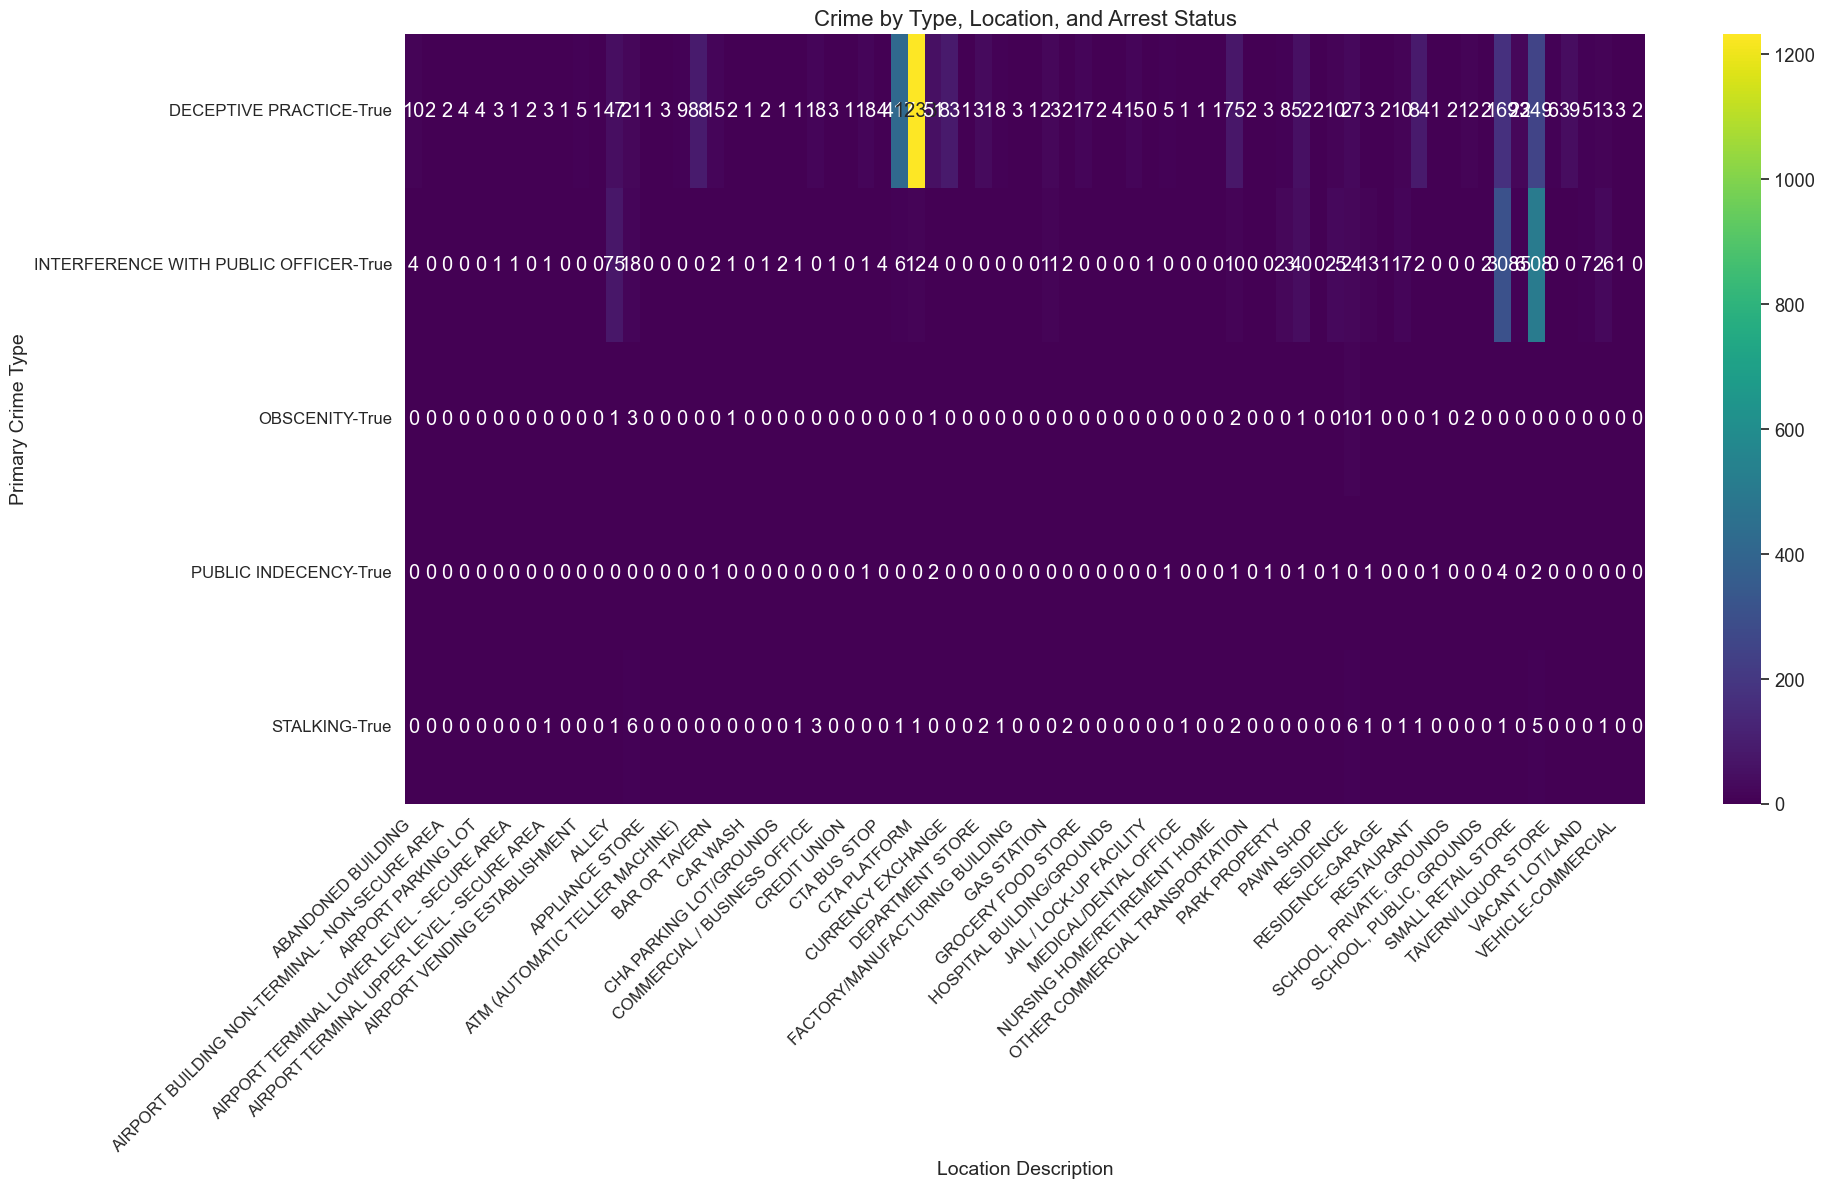

In [1715]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.2)  # Adjust font scale as needed
sns.heatmap(pivot_table_filled, annot=True, cmap='viridis', cbar=True, fmt='g')
plt.title('Crime by Type, Location, and Arrest Status', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.xlabel('Location Description', fontsize=14)
plt.ylabel('Primary Crime Type', fontsize=14)
plt.grid(True)
plt.show()


In [1529]:
chicago_crime_2008_high_type_df = chicago_crime_2008_arrests_true_df[chicago_crime_2008_arrests_true_df["Primary Type"].isin(highest_percent_primary_crime_list)]
chicago_crime_2008_high_type_df["Location Description"].value_counts()

len(chicago_crime_2008_arrests_false_df[chicago_crime_2008_arrests_false_df["Primary Type"].isin(highest_percent_primary_crime_list)])

# Plott the differences and show stacked bar

13047

conlusion the crimes iin 2008 was barely a few and they all got caught and in 2012 there was 0 non caught and crime rising and all caguth

# 5 - Troubles at home

**5.1** How many recorded crimes are domestic?

In [807]:
domestic_true_08_to_12_df = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Domestic"]== True]

In [873]:
domestic_count= domestic_true_08_to_12_df["Domestic"].value_counts()

In [880]:
print(f"There are {domestic_count.sum()} {domestic_count.index.name} recorded crimes")

There are 309749 Domestic recorded crimes


**5.2** How many recorded crimes, of the primary type *offense involving children*, are domestic?

In [811]:
domestic_children_08_to_12_df= domestic_true_08_to_12_df[domestic_true_08_to_12_df["Primary Type"] == "OFFENSE INVOLVING CHILDREN"]

In [915]:
domestic_children_crimes= domestic_children_08_to_12_df["Primary Type"].value_counts()
domestic_children_crimes

Primary Type
OFFENSE INVOLVING CHILDREN    10921
Name: count, dtype: int64

In [899]:
print(f"There are {domestic_children_crimes.sum()} recorded crimes with Primary type: {domestic_children_crimes.index[0]} ")

There are 10921 recorded crimes with Primary type: OFFENSE INVOLVING CHILDREN 


**5.3** How much more likely is it that an offense involving children is domestic?

In [904]:
chance_domestic_children=round((domestic_children_crimes.sum() / domestic_true_08_to_12_df["Primary Type"].value_counts().sum()) * 100,1)

In [908]:
print(f" It is {chance_domestic_children}% more likely offense involves children")

 It is 3.5% more likely offense involves children


**5.4** What's the worst weekday in terms of number of domestic offenses involving children? How does it compare to the other weekdays?

In [994]:
domestic_children_08_to_12_df_serie = pd.DatetimeIndex(domestic_children_08_to_12_df["Date"]).weekday.value_counts()
domestic_children_08_to_12_df_serie.index = domestic_children_08_to_12_df_serie.index.map(format_day)


In [1025]:
pd.DatetimeIndex(domestic_children_08_to_12_df["Date"]).weekday.value_counts()

Date
2010-01-01 00:01:00    39
2010-01-01 00:00:00    38
2011-01-01 00:00:00    31
2012-01-01 00:00:00    29
2008-01-01 00:01:00    29
                       ..
2009-09-21 19:19:00     1
2009-10-13 17:20:00     1
2009-09-29 06:00:00     1
2009-11-23 18:35:00     1
2012-05-19 17:41:00     1
Name: count, Length: 9698, dtype: int64

In [1026]:
domestic_children_08_to_12_comparing_df= pd.DataFrame(domestic_children_08_to_12_df_serie).reset_index().rename(columns={"Date":"weekDay","count":"crimes"})

In [1028]:
print(f"{domestic_children_08_to_12_df_serie.index[0]} is the worst weekday with {domestic_children_08_to_12_df_serie.iloc[0]} crimes \n Look down here at table:")
domestic_children_08_to_12_comparing_df


Friday is the worst weekday with 2023 crimes 
 Look down here at table:


,weekDay,crimes
0,Friday,2023
1,Saturday,1716
2,Sunday,1684
3,Thursday,1433
4,Tuesday,1388
5,Wednesday,1372
6,Monday,1305


**5.5** What's the distribution, in terms of recorded crimes, for domestic *and* sexual offenses involving children? What's the arrest percentage for each? 

In [1115]:
r = domestic_true_08_to_12_df[(domestic_true_08_to_12_df["Arrest"] == True) &(domestic_true_08_to_12_df["Description"].str.contains("CHILD"))].reset_index()
r["Primary Type"].value_counts().sum

<bound method Series.sum of Primary Type
OFFENSE INVOLVING CHILDREN    1880
BATTERY                         37
SEX OFFENSE                     13
Name: count, dtype: int64>

**5.6*** What period of the day does the specific kind of (domestic) offense against children, with the most recorded arrests, tend do occur? 

How does it look for all weekdays individually?
        Can you find certain periods of the week that are especially bad? 

**5.7*** Looking at any given year as a whole, what's the worst period in terms of domestic number of offenses involving children? Can you find any trends? Does the trend seem to be consistent for every other year? 

# 6 - Bad Boys Bad Boys whatcha gonna do

**6.1** In general, what weekday is a crime most likely to occur? Which day is the safest?

**6.2** Which is the most unsafe weekday for you if you'd like to avoid the following:

a) getting your phone stolen by sneaky pickpockets (THEFT) 

b) having your handbag forcibly pulled away (ROBBERY) 

c) getting jumped in an alley (ASSAULT)

For each of the above crimes, also answer at what locations you should be extra careful around.

**6.3** Which are the worst 10 dates (most recorded crimes) of 2008? Does this trend hold for the other years?

**6.4** From the perspective of total number of crime records, which are the Top 10 primary crime types? Which are the Bottom 10? 

Consider this question for the years 2008-2012 as a whole. 

**6.5** For all those crime categories you identified in 6.4, how does their distribution instead look per year - rather than the full 2008-2012 period as a whole?

**6.6*** Which primary crime types does the city of Chicago seem to get better at preventing? For which ones is it the opposite, i.e, the situation is getting worse? 

# 7 - Night Stalker

**7.1** Are there more or less crimes reported during daytime, compared with nighttime? Daytime is considered as all hours between 06:00-18:00, nighttime is the rest of the day.

**7.2** In general, for each weekday, how many crimes are recorded during daytime and how many during nighttime? What are the trends? Are there any weekdays that stands out somehow?

**7.3** Does the trends you've found in 7.3 also hold if you look at each year individually?

**7.4** Are there any weekdays in which Stalking occurs more often during nighttime?

**7.5*** Are there any specific primary crime types that most often occur during nights? If so, which ones are they? Where do they occur? Are certain days of the week notable here somehow?

# 8 - Grand Theft Auto

**8.1** You just bought a new car. What weekday should you be most wary of as it has the highest risk for a Grand Theft Auto-style robbery (MOTOR VEHICLE THEFT)?

**8.2** For that day, where (at what location) should you absolutely avoid leave your car carelessly? Where is it seemingly safest to do so?

**8.3*** Are there certain periods of the year/month/day/time of day where GTA is more frequent?

# 9. Just send me like location

https://www.youtube.com/watch?v=k7yBJ5Ffkdo

**9.1** Are there any (geographical) areas hit particularly hard by prostitution on friday nights?

**9.2*** Can you vizualise the locations from 9.1 on a map of Chicago? Is there a concentration somewhere? 

**9.3*** Can you find any geographical concentration of other crime categories? Perhaps even by weekday and or day/nighttime or certain dates of the year? Plot these on a map of Chicago. 

# 10 - The $ factor

**10.1** Merge the crime and census datasets together in a suitable way.

**10.2*** Are there certain kinds of socoeconomic area that are more prone to certain kinds of crimes? Do a deep dive in the direction you fancy yourself here.

# 11 - Spotligt on you, Maestro!

There are obviously so much more to gain by analysing these datasets. This is now your opportunity to dwelve deeper into what you yourself like. Recall that the census data contributed with **alot** of dimensions.

    Instructions: think of one or several questions (as we've done above). Then, proceed with your own deep dive analysis and provide your answers.

# 12 - A moment of reflection

**12.1** Looking back at the analysis that you've done, what do you think about it? Specifically, how reliable are your conclusions? Is there anything that could be done to improve the factuality of the analysis? If so, what?